# Temperature response testing

In [18]:
import sys

import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.time
from astropy.visualization import quantity_support
from aiapy.calibrate.util import get_pointing_table

from synthesizAR.atomic.idl import read_spectral_table

sys.path.append('../')
from mocksipipeline.physics.dem.data_prep import DataQuery
from mocksipipeline.physics.dem.dem_models import get_aia_temperature_response, get_xrt_temperature_response

In [3]:
obstime = astropy.time.Time('2020-11-09 18:00:00')

In [4]:
pt = get_pointing_table(obstime-12*u.h, obstime+12*u.h)

In [5]:
tbin_edges = 10**np.arange(5.5,7.5, .1,) * u.K

In [9]:
spec_table = read_spectral_table('../pipeline-runs/chiantia-spectra-full.asdf')

In [11]:
dq = DataQuery('../pipeline-runs/test-1/',
               obstime,
               tbin_edges,
               spectra=spec_table,
               aia_correction_table='/Users/wtbarnes/ssw/sdo/aia/response/aia_V8_20171210_050627_response_table.txt',
               aia_error_table='/Users/wtbarnes/ssw/sdo/aia/response/aia_V3_error_table.txt',
               aia_pointing_table=pt)

In [12]:
kernels = dq.response_kernels

Files Downloaded:   0%|          | 0/7 [00:00<?, ?file/s]

aia_lev1_171a_2020_11_09t17_59_57_34z_image_lev1.fits:   0%|          | 0.00/11.8M [00:00<?, ?B/s]

aia_lev1_211a_2020_11_09t17_59_57_62z_image_lev1.fits:   0%|          | 0.00/9.31M [00:00<?, ?B/s]

aia_lev1_94a_2020_11_09t17_59_59_12z_image_lev1.fits:   0%|          | 0.00/10.6M [00:00<?, ?B/s]

aia_lev1_335a_2020_11_09t18_00_00_63z_image_lev1.fits:   0%|          | 0.00/7.01M [00:00<?, ?B/s]

comp_XRT20201109_181902.6.fits:   0%|          | 0.00/4.22M [00:00<?, ?B/s]

aia_lev1_193a_2020_11_09t18_00_04_84z_image_lev1.fits:   0%|          | 0.00/10.9M [00:00<?, ?B/s]

aia_lev1_131a_2020_11_09t17_59_54_61z_image_lev1.fits:   0%|          | 0.00/8.18M [00:00<?, ?B/s]

/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 9 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 10 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/astropy/units/quantity.py:626: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 9 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python

In [21]:
aia_responses_ssw = get_aia_temperature_response('../mocksipipeline/data/aia_temperature_response.asdf',
                                                 [94, 131, 171, 193, 211, 335] * u.angstrom,
                                                 dq.temperature_bin_centers)
xrt_responses_ssw = get_xrt_temperature_response('../mocksipipeline/data/xrt_temperature_response.asdf',
                                                 ['Be_thin'],
                                                 dq.temperature_bin_centers,
                                                 correction_factor=1)
all_responses_ssw = {**aia_responses_ssw, **xrt_responses_ssw}

In [23]:
all_responses_ssw.keys()

dict_keys(['94.0 Angstrom', '131.0 Angstrom', '171.0 Angstrom', '193.0 Angstrom', '211.0 Angstrom', '335.0 Angstrom', 'Be thin-Open'])

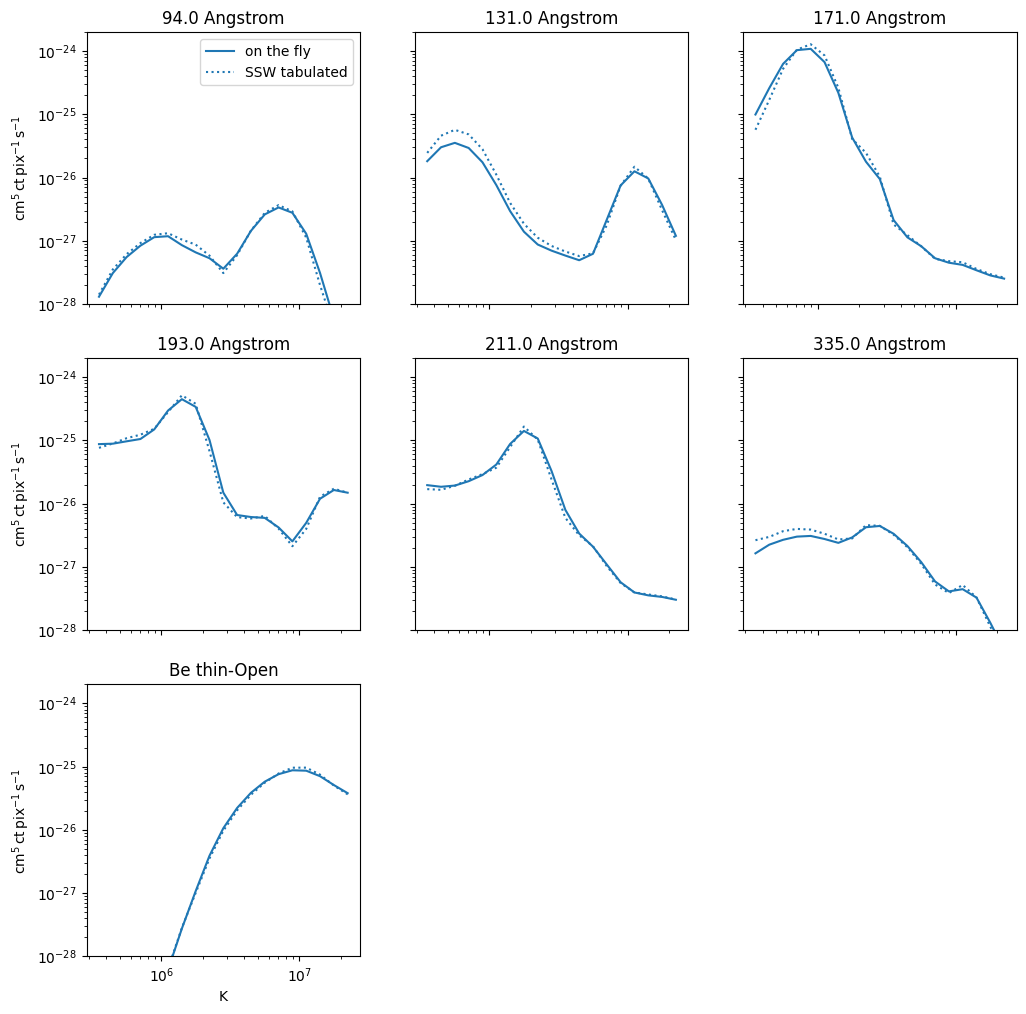

In [33]:
fig = plt.figure(figsize=(12, 12))
with quantity_support():
    for i,k in enumerate(kernels):
        ax = fig.add_subplot(3,3,i+1)
        l, = ax.plot(dq.temperature_bin_centers, kernels[k].to('cm5 ct pix-1 s-1'), label='on the fly')
        ax.plot(dq.temperature_bin_centers, all_responses_ssw[k].to('cm5 ct pix-1 s-1'), color=l.get_color(), ls=':', label='SSW tabulated')
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.set_ylim(1e-28, 2e-24)
        ax.set_title(k)
        ax.label_outer()
        if i == 0:
            ax.legend()

In [31]:
spec_table.meta

{'ioneq_filename': 'chianti.ioneq',
 'abundance_filename': 'sun_coronal_1992_feldman_ext.abund',
 'ion_list': 'all',
 'version': '10.0.2'}